# Prediccion de Precios de Carros

Creacion de un modelo de Machine Learning para predecir los precios de los carros en el mercado estadounidense. El objetivo es ayudar a nuevos integrantes a comprender factores de precios importantes en este mercado.

# Seccion 1. Analisis y exploracion de los datos

## Librerias

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Gestion de advertencias

In [49]:
import warnings

# ignora advertencias sobre funcionalidades que se van a dejar de usar
warnings.simplefilter(action='ignore', category=FutureWarning)

# ignora advertencias sobre problemas en tiempo de ejecucion
warnings.filterwarnings('ignore', category=RuntimeWarning)

## Cargar datos

In [50]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [51]:
# resumen por variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

> Las 26 variables estan libres de valores faltantes. Existen 205 registros

## Entendiendo las variables predictoras

### **Symboling**

Hace referencia al riesgo del auto y va en una escala de -2 a 3,siendo el -2 menos riesgoso y 3 mas riesgoso.

In [52]:
# Categorias de la variable Symboling
df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [53]:
# porcentaje de las diferentes categorias de symboling
df['symboling'].value_counts(normalize=True)*100

 0    32.682927
 1    26.341463
 2    15.609756
 3    13.170732
-1    10.731707
-2     1.463415
Name: symboling, dtype: float64

- La mayoria de los carros son 0, 1, 2, es decir con un riesgo considerable

- Son pocos los carros con bajo riesgo (-2)

### **Aspiration**

Es una propiedad del motor (de combustion interna) que muestra si la ingesta de oxigeno es estandar (presion atmosferica) o mediante turbocompresor (entrada de oxigeno a presion)

In [54]:
# categorias de la variable aspiration
df['aspiration'].value_counts(normalize=True)*100

std      81.95122
turbo    18.04878
Name: aspiration, dtype: float64

- El 81.9% de los carros son de ingesta de oxigeno estandar
- El 18.1% son de turbocompresor

### **Drivewheel**

Hace referencia a la rueda de traccion del carro: rueda delantera (frontwheel), rueda trasera (rear wheel) o traccion en las cuatro ruedas (four-wheel drive).

In [55]:
df['drivewheel'].value_counts(normalize=True)*100

fwd    58.536585
rwd    37.073171
4wd     4.390244
Name: drivewheel, dtype: float64

- El 58.3% de los carros son de traccion delantera
- El 37.1% son de traccion trasera
- El 4.4% son de traccion en las 4 ruedas.

### **Wheelbase**

Es la distancia entre el centro de las ruedas delanteras y traseras.

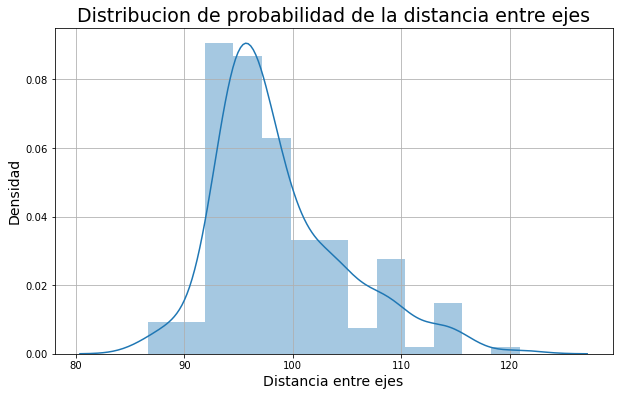

In [56]:
# como es una variable numerica, veamos su distribucion
plt.figure(figsize=(10, 6))
sns.distplot(df['wheelbase'])
plt.grid(True)
plt.xlabel('Distancia entre ejes', fontsize= 14)
plt.ylabel('Densidad', fontsize= 14)
plt.title('Distribucion de probabilidad de la distancia entre ejes', fontsize= 19);

- La mayoria de los carros tienen una distancia entre ejes entre 92.5 y 97.5 

### **Curbweight**

Peso del carro sin ocupantes ni equipajes

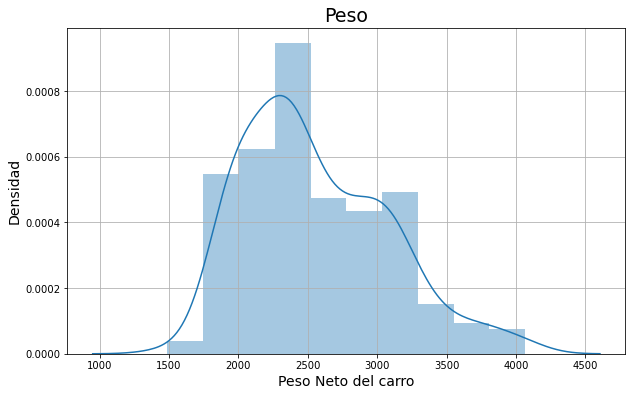

In [57]:
# ditribucion
plt.figure(figsize=(10, 6))
sns.distplot(df['curbweight'])
plt.grid(True)
plt.xlabel('Peso Neto del carro', fontsize= 14)
plt.ylabel('Densidad', fontsize= 14)
plt.title('Peso', fontsize= 19);

- La mayoria de los carros pesan entre 2000 y 2500.

### **Stroke**

Es el volumen del motor (distancia recorrida por el piston en cada ciclo)

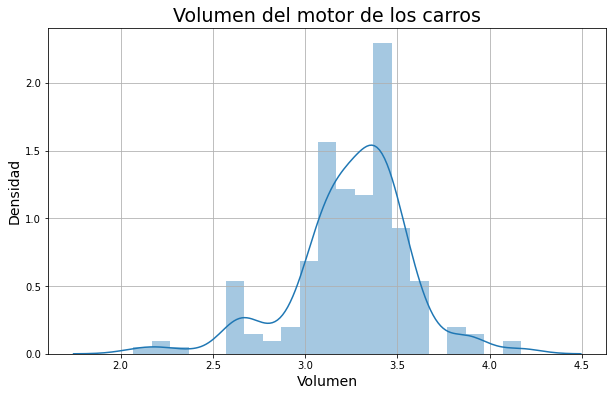

In [58]:
# distribucion
plt.figure(figsize=(10, 6))
sns.distplot(df['stroke'])
plt.grid(True)
plt.xlabel('Volumen', fontsize= 14)
plt.ylabel('Densidad', fontsize= 14)
plt.title('Volumen del motor de los carros', fontsize= 19);

- Hay una gran cantidad de carros con volumen de motor de 3.4.

### **Compression ration**

Relacion de volumen de la camara de compresion de mayor a menor capacidad

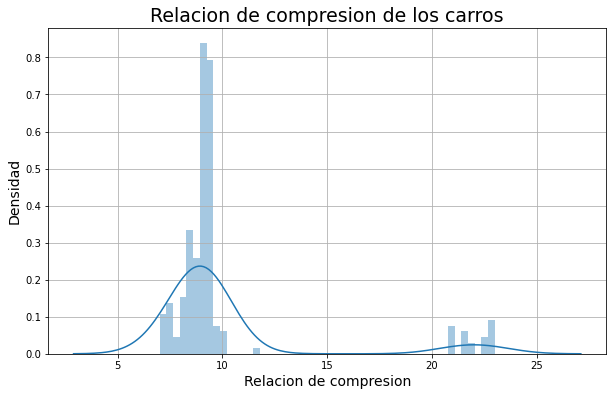

In [59]:
# ditribucion
plt.figure(figsize=(10, 6))
sns.distplot(df['compressionratio'])
plt.grid(True)
plt.xlabel('Relacion de compresion', fontsize= 14)
plt.ylabel('Densidad', fontsize= 14)
plt.title('Relacion de compresion de los carros', fontsize= 19);

- La mayoria de los carros tienen una relacion de compresion de 7.5 a 10.0
- Hay unos pocos con relacion de compresion entre 20 y 22.5
- En estos dos rangos se encuentran todos los carros.

## Entendiendo variable objetivo

Estamos interesados en predecir el precio de los carros, por tanto, la variable objetivo es *Price*.  Vamos a visualizar la variable en un histograma y en un grafico de densidad.

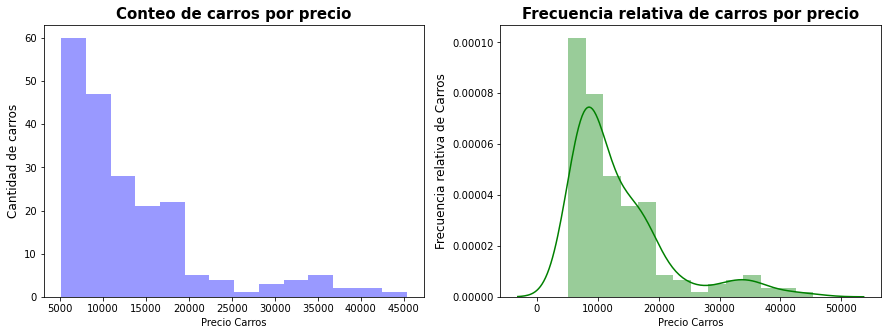

In [60]:
# tamano de los graficos y cantidad de grilla
fig, ax= plt.subplots(1,2,figsize=(15,5))

# Histograma
sns.distplot(df['price'], norm_hist=False, kde=False, ax=ax[0], color='blue')
ax[0].set_xlabel('Precio Carros')
ax[0].set_ylabel('Cantidad de carros',size=12)
ax[0].set_title('Conteo de carros por precio',size=15,weight="bold")

# Grafico de densidad
sns.distplot(df['price'], kde=True, ax=ax[1], color='green')
ax[1].set_xlabel('Precio Carros')
ax[1].set_ylabel('Frecuencia relativa de Carros', size=12)
ax[1].set_title('Frecuencia relativa de carros por precio', size=15, weight='bold');

- El precio tiene un sesgo positivo. Sin embargo, la mayoria de los carros tienen precios bajos.

- Entre 105 y 107 carros tienen un precio inferior a 10.000. Representan mas del 50%.

- Entre 68 y 70 carros tienen precio entre 10.000 y 20.000. Representan cerca del 35%.

- Alrededor del 85% de los carro tienen un precio entre 5.000 y 20.000 dolares.

- El grafico derecho sugiere que hay 2 distribuciones, una para carros con precios entre 5.000 y 25.000 y otra para carros de mas de 25.000

# Seccion 2. Exploracion de los Datos

## Relacion entre variables

Veamos como se relacionan las variables predictoras con la variable objetivo.

In [61]:
# seleccionar variables predictoras numericas
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Eliminamos la variable *symboling* debido a que es de tipo categorica y *car_ID* ya que es un indice de los registros

In [62]:
df_numeric = df_numeric.drop(['symboling', 'car_ID'], axis=1)
df_numeric.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Cruzemos todas las variables entre si mediante graficos de dispersion para observar el tipo de relacion con la variable objetivo.

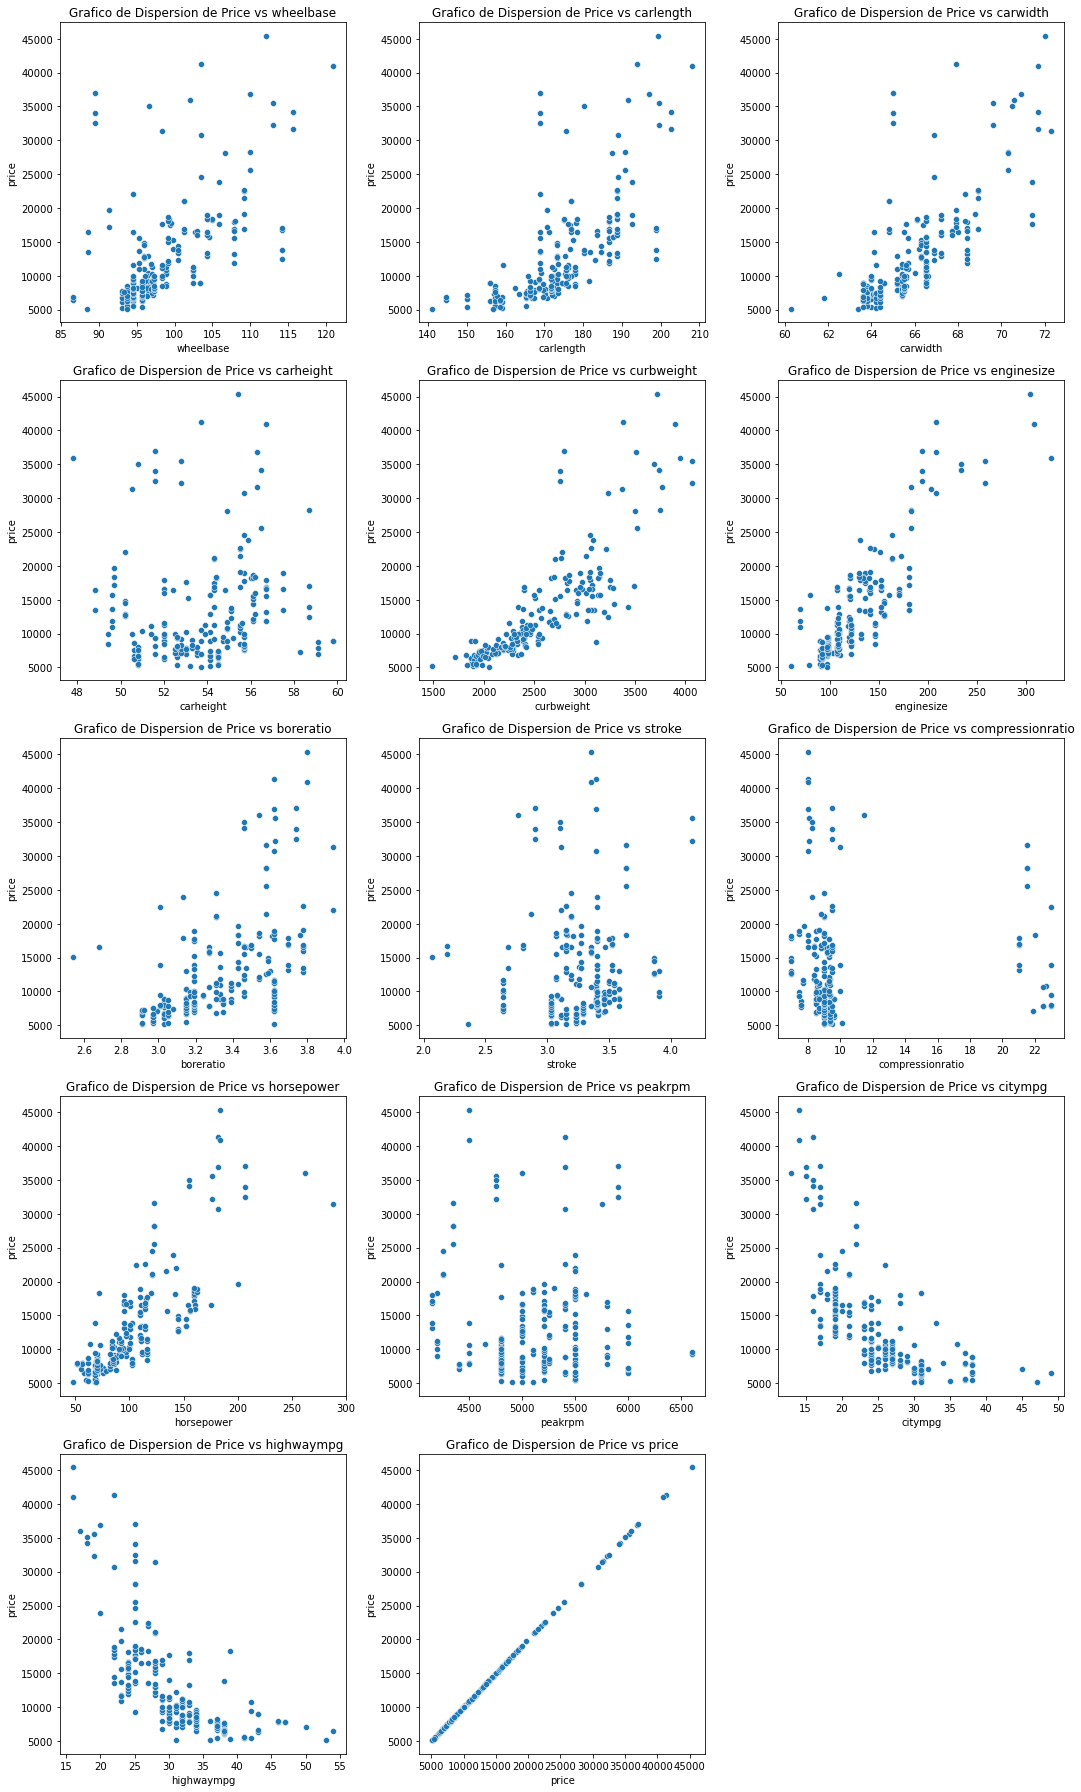

In [63]:
# Número de columnas predictoras
num_cols = len(df_numeric.columns) - 1
# Número de filas necesarias para una grilla de 3 columnas
num_rows = (num_cols + 2) // 3  
# Crear una grilla de subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows)) 

# Aplanar los ejes para facilitar la iteración
axes = axes.flatten()

for i, col in enumerate(df_numeric.columns):  
    # grafico de dispersion de cada variable objetivo con price    
    sns.scatterplot(x=df_numeric[col], y=df_numeric['price'], ax=axes[i])
    axes[i].set_title(f'Grafico de Dispersion de Price vs {col}')

# Eliminar cualquier subplot vacío
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- Las variables que presentan una relacion lineal con *Price* son: ancho del carro (carwidth), peso en vacio (curbweight), tamaño del motor (enginesize), caballos de fuerza (horsepower), perforacion (boreration) y mpg en ciudad (citympg) 

- Las demas variables no tienen relaciones lineales fuertes con el precio o ningun tipo de relacion.
 

## Matriz de Correlacion

Veamos, analiticamente, la relacion lineal entre las variables mediante la matriz de correlacion 

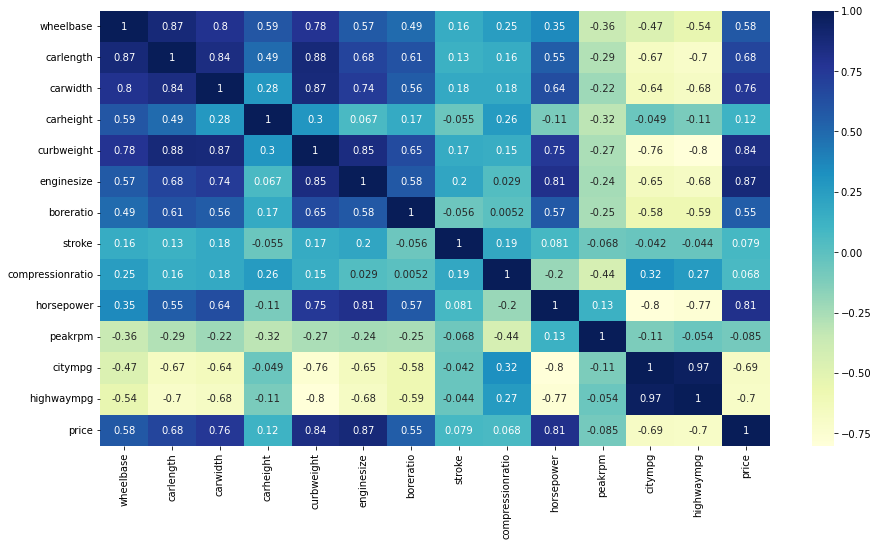

In [64]:
corr = df_numeric.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap='YlGnBu');

### Conclusiones:

**1.- Variable dependiente con las variables independientes**
> Las variables con correlacion positiva con Price son enginesize, curbweight, horsepower y carwidth. Todas estas variables  representan el tamano, peso y potencia del motor del carro.

> Las variables con correlacion negativa  con Price son citympg y highwaympg. Esto sugiere que los carros con alto kilometraje pueden caer en la categoria de 'Economicos'. Es decir, los carros de bajo precio tienen en su mayoria mpg altos.

**2.- Correlacion entre variables independientes**
> Debemos tener en cuenta que muchas variables independientes estan correlacionadas. Esto indica un problema de multicolinealidad que podria perjudicar el rendimiento del modelo. Variables como wheelbase, carlength, curbweight, enginesize, entre otros son medidas de tamaño y peso y estan correlacionados positivamente.

# Seccion 3: Limpieza de Datos

## Conversion de variables

In [65]:
# veamos un resumen de cada variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

La variable *symboling* es de tipo numerica. Sin embargo, ya vimos que es una variable categorica por lo que debemos cambiar su tipo. 

In [66]:
# convertir symboling a categorica
df['symboling'] = df['symboling'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Arreglar valores de variables

Veamos los nombres de los carros *CarName*

In [67]:
df['CarName']

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

Vamos a obtener solamente el nombre de la marca de carro. Para ello, creamos una nueva columna y obtendremos solo la primera palabra de cada valor que corresponde a la marca.

In [68]:
name_car = df['CarName'].apply(lambda x: x.split(' ')[0])
name_car[:5]

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: CarName, dtype: object

Agregamos la nueva columna al DataFrame y verificamos los valores de marcas unicas.

In [69]:
df['car_company'] = name_car
df['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: car_company, dtype: int64

Observamos que hay marcas de carros duplicadas como *toyota* y *toyouta*. Vamos a corregir la ortografia de las marcas 

In [70]:
# volkswagen
df.loc[(df['car_company']=='vw')|(df['car_company']=='vokswagen'), "car_company"] = "volkswagen"

# porsche
df.loc[(df['car_company']=='porcshce'), 'car_company'] = 'porsche'

# toyota
df.loc[(df['car_company']=='toyouta'), 'car_company'] = 'toyota'

# nissan
df.loc[(df['car_company']=='Nissan'), 'car_company'] = 'nissan'

# mazda 
df.loc[(df['car_company']=='maxda'), 'car_company'] = 'mazda'

# veriquemos nuevamente los valores unicos
df['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

Ya estan completamente corregidos. Ahora, eliminamos la columna *CarName* ya que no nos proporcina informacion de interes

In [71]:
# eliminar CarName
df = df.drop('CarName', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

# Seccion 4: Preparacion de los datos

Separamos las variables predictoras y la variable objetivo

In [72]:
# variables predictoras
X = df.drop(columns=['price', 'car_ID'])

# variable objetivo
y = df['price']

In [73]:
X.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,car_company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,audi


In [74]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

Seleccionamos del grupo de variables predictoras, las variables categoricas

In [75]:
cars_categorical = X.select_dtypes(include=['object'])
cars_categorical.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


Hay 11 variables categoricas que son predictoras. Ahora creamos variables ficticias para cada variable categorica seleccionada

In [76]:
# variables ficticias de las categoricas
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


De las 11 variables categoricas, obtuvimos un total de 55 variables ficticias. Ahora eliminamos las variables categoricas del DataFrame

In [77]:
X = X.drop(columns=cars_categorical)
X.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


Vemos que quedan 13 variables de tipo numerica en las variables predictoras. Ahora, vamos a juntar las variables predictoras que quedaron con las variables ficticias correspondiente a las categoricas.

In [78]:
dfX = pd.merge(X, cars_dummies, left_index=True, right_index=True)
dfX.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,0,0,0


In [79]:
# nombre de las columnas
dfX.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'symboling_-1', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'car_company_audi',
       'car_company_bmw', 'car_company_buick', 'car_company_chevrolet',


# Seccion 5: Escalando las variables

Escalamos las variables para facilitar la interpretacion de los coeficientes. Ahora las variables poseen valores entre -1 y 1.

In [80]:
# libreria para escalar
from sklearn.preprocessing import scale

# almacenar los nombres de las columnas en una variable para recuperarlos nuevamente
cols = dfX.columns
# al escalar el df se convierte en un array de numpy
dfX_scaled = pd.DataFrame(scale(dfX))
# recuperamos los nombres de las variables
dfX_scaled.columns = cols

dfX_scaled.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
4,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812


Verifiquemos que todas las variables numericas tengan media de cero o cercano a cero y desviacion estandar de 1

In [81]:
dfX_scaled.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
count,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,...,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02
mean,-1.496906e-15,3.730349e-15,9.964929e-16,-4.408398e-16,9.910771e-17,5.415722e-19,2.267021e-15,2.126483e-15,-3.115394e-16,1.914458e-16,...,-6.228080e-17,-4.947262e-16,-5.524037e-17,3.076130e-16,-1.252386e-16,-1.437874e-16,8.529762e-17,-7.251652e-16,-6.452833e-16,3.552714e-16
std,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,...,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00
min,-2.023713e+00,-2.677244e+00,-2.620512e+00,-2.430664e+00,-2.055348e+00,-1.586561e+00,-2.923049e+00,-3.789311e+00,-7.931011e-01,-1.422573e+00,...,-3.102526e-01,-2.381198e-01,-1.880254e-01,-1.581139e-01,-9.925833e-02,-1.736397e-01,-2.493515e-01,-4.300827e-01,-2.493515e-01,-2.381198e-01
25%,-7.085959e-01,-6.296552e-01,-8.447824e-01,-7.076263e-01,-7.904486e-01,-7.199469e-01,-6.653141e-01,-4.648342e-01,-3.892993e-01,-8.648707e-01,...,-3.102526e-01,-2.381198e-01,-1.880254e-01,-1.581139e-01,-9.925833e-02,-1.736397e-01,-2.493515e-01,-4.300827e-01,-2.493515e-01,-2.381198e-01
50%,-2.924196e-01,-6.900603e-02,-1.905661e-01,1.538927e-01,-2.725519e-01,-1.662771e-01,-7.312136e-02,1.105560e-01,-2.883489e-01,-2.311186e-01,...,-3.102526e-01,-2.381198e-01,-1.880254e-01,-1.581139e-01,-9.925833e-02,-1.736397e-01,-2.493515e-01,-4.300827e-01,-2.493515e-01,-2.381198e-01
75%,6.065210e-01,7.354037e-01,4.636501e-01,7.282388e-01,7.305117e-01,3.392475e-01,9.262039e-01,4.941494e-01,-1.873985e-01,3.012332e-01,...,-3.102526e-01,-2.381198e-01,-1.880254e-01,-1.581139e-01,-9.925833e-02,-1.736397e-01,-2.493515e-01,-4.300827e-01,-2.493515e-01,-2.381198e-01
max,3.686225e+00,2.766741e+00,2.987056e+00,2.492302e+00,2.907988e+00,4.792679e+00,2.258638e+00,2.923575e+00,3.244916e+00,4.661448e+00,...,3.223180e+00,4.199567e+00,5.318432e+00,6.324555e+00,1.007472e+01,5.759051e+00,4.010403e+00,2.325134e+00,4.010403e+00,4.199567e+00


Ahora, dividimos los datos en dos grupos: entrenamiento y de prueba

In [82]:
# libreria para dividir los datos
from sklearn.model_selection import train_test_split

# divimos los datos en 70% de entrenamiento y 30% de prueba
X_train, X_test, y_train, y_test = train_test_split(dfX_scaled, y, train_size=0.7, test_size=0.3, random_state=100)


# Seccion 6: Construccion del Modelo y evaluacion de desmepeno

Dado que la variable dependiente *Price* parece estar relacionado lienalmente con la mayoria de las variables predictoras, vamos a utilizar la Regresion Lineal. Vamos a crear un modelo de regresion lineal que utilice todas las variables

In [83]:
# librerias para creare un modelo de regresion lineal
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# creamos el modelo
lm = LinearRegression()
# entrenamos el modelo con los datos de entrenamiento
lm.fit(X_train, y_train)
# generamos una prediccion con los datos de prueba
y_pred_test = lm.predict(X_test)
# generamos una prediccion con los datos de entrenamiento
y_pred_train = lm.predict(X_train)

Evaluamos el desempeno del modelo mediante las metricas

In [84]:
# ------------ R Cuadrado --------------------

# libreria para obtener el valor de R cuadrado
from sklearn.metrics import r2_score

# calculo de R cuadrado para datos de entrenamiento
r_score_train = r2_score(y_true=y_train, y_pred=y_pred_train)
# calculo de R cuadrado para datos de prueba
r_score_test = r2_score(y_true=y_test, y_pred=y_pred_test)

# mostrar valores de R cuadrado con datos de entrenamiento y de prueba
print(f'R cuadrado para datos de entrenamiento: {r_score_train.round(3)}')
print(f'R cuadrado para datos de prueba: {r_score_test.round(3)}')

R cuadrado para datos de entrenamiento: 0.976
R cuadrado para datos de prueba: 0.838


In [85]:
# ---------------- RMSE -----------------

# calculamos el error estandar para datos de entrenamiento
error_train = y_pred_train - y_train
rmse_train = ((error_train**2).mean())**0.5

# calculamos el error estandar para datos de prueba
error_test = y_pred_test - y_test
rmse_test = ((error_test**2).mean())**0.5

# mostrar valores de RMSE
print(f'RMSE para datos de entrenamiento: {rmse_train}')
print(f'RMSE para datos de prueba: {rmse_test}')

RMSE para datos de entrenamiento: 1213.0021196738403
RMSE para datos de prueba: 3365.4652343880853


> El alto valor de R cuadrado en el entrenamiento y su amplia diferencia con el R cuadrado de los datos de prueba indica un sobreajuste del modelo. Vamos a utlizar la eliminacion recursiva de caracteristicas para reducir la dimensionalidad y asi apalear el overfitting.

# Seccion 7: Seleccion de variables usando RFE

Vamos a determinar el numero optimo de variables

In [86]:
# libreria para seleccion de variables
from sklearn.feature_selection import RFE
import statsmodels.api as sm

# lista de variables optimas: entre 4 y 30
n_features_list = list(range(4,31))
# lista para almacenar el R cuadrado ajustado de cada cantidad de variable
train_adjusted_r2 = []
# lista para almacenar el r cuadrado de los datos de entrenamiento
train_r2 = []
# lista para almacenar el r cuadrado de los datos de prueba
test_r2 = []
# lista para almacenar el RMSE de los datos de entrenamiento
train_RMSE = []
# lista para almacenar el RMSE de los datos de prueba
test_RMSE = []

# Vamos entrenando el modelo iniciando en 4 variables hasta llegar a 30
# y guardamos cada metrica resultante
for n_features in range(4, 31):
    
    # RFE con n variables
    lm = LinearRegression()
    
    # Especificar el numero de variables
    rfe_n = RFE(estimator=lm, n_features_to_select=n_features)
    
    # ajustar el modelo RFE con n variables
    rfe_n.fit(X_train, y_train)
    
    # seleccionando variables seleccionadas por rfe_n
    col_n = X_train.columns[rfe_n.support_]
    # support_: retorna una matriz de booleanos para indicar si se selecciono un atributo con RFE
    
    # seleccionamos los datos de entrenamiento y de prueba para las n variables seleccionadas
    X_train_rfe_n = X_train[col_n]
    X_test_rfe_n = X_test[col_n]
    
    # agrega una constante al modelo que representa el intercepto
    X_train_rfe_n = sm.add_constant(X_train_rfe_n)
    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')
    
    # ajustar el modelo de regresion lineal con n variables
    lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
    
    # creamos las predicciones para los datos de entrenamiento y de prueba
    y_pred_test = lm_n.predict(X_test_rfe_n)
    y_pred_train = lm_n.predict(X_train_rfe_n)
    
    # ---- Calculo de las metricas
    
    # R cuadrado
    train_adjusted_r2.append(lm_n.rsquared_adj)
    train_r2.append(lm_n.rsquared)
    test_r2.append(r2_score(y_test, y_pred_test))
    
    # RMSE
    error_test = y_pred_test - y_test
    error_train = y_pred_train - y_train
    
    test_RMSE.append(((error_test**2).mean())**0.5)
    train_RMSE.append(((error_train**2).mean())**0.5)

Una vez que hemos evaluado el modelo desde 4 variables hasta 30 y obtenido de cada uno sus metricas, vamos a graficar R cuadrado y RMSE en funcion de la cantidad de variables para determinar el numero optimo de variables para el modelo de regresion

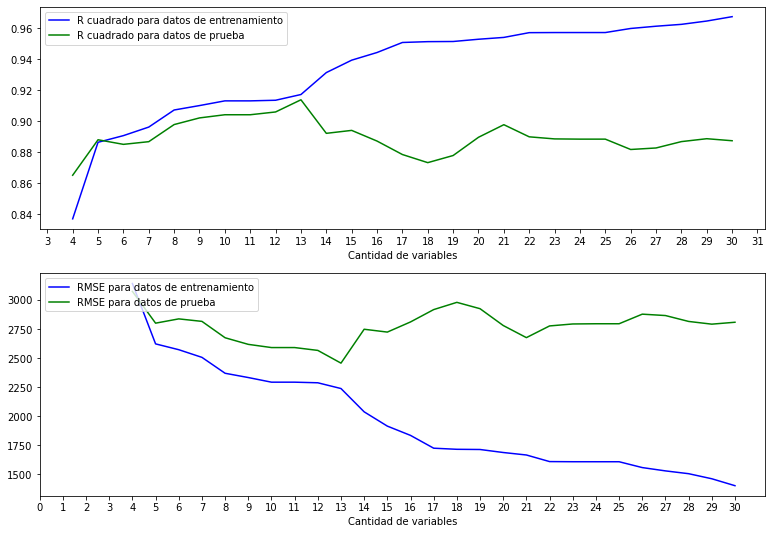

In [87]:
# librerias para personalizar las etiquetas
import matplotlib.ticker as plticker

# grilla
fig, ax = plt.subplots(2, 1, figsize=(13, 9))

# grafico de R cuadrado
ax[0].plot(n_features_list, train_r2, 'b', label='R cuadrado para datos de entrenamiento')
ax[0].plot(n_features_list, test_r2, 'g', label='R cuadrado para datos de prueba')
ax[0].set_xlabel('Cantidad de variables')
ax[0].legend(loc='upper left')
loc = plticker.MultipleLocator(base=1)
ax[0].xaxis.set_major_locator(loc)

# grafico de RMSE
ax[1].plot(n_features_list, train_RMSE, 'b',label="RMSE para datos de entrenamiento")
ax[1].plot(n_features_list, test_RMSE, 'g',label="RMSE para datos de prueba")
ax[1].set_xlabel('Cantidad de variables')
ax[1].legend(loc='upper left')
plt.xticks(np.arange(0, 31, step=1));
